<a href="https://colab.research.google.com/github/PremKumar-V/NLP_Projects/blob/main/Disaster_Tweets_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Tweets Classification

### Reference
- [x] Dataset Link

### Task
- Try Different Tokenizer
- Pick one Tokenizer and Test with `BagOfWords` and `Tf-idf`
- Try Torch Metrics and Torch Graph

## Prepare Notebook


In [2]:
# Install Necessary Dependencies

%%bash

pip install torchviz torchmetrics kaggle --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 8.9 MB/s eta 0:00:00


In [5]:
# Download Dataset

%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json

kaggle competitions download -c nlp-getting-started
unzip nlp-getting-started.zip -d data

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nlp-getting-started.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
# Import Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load Dataset

trainFileName = '/content/data/train.csv'
testFileName = '/content/data/test.csv'
subFileName = '/content/data/sample_submission.csv'

In [9]:
trainDf = pd.read_csv(trainFileName)
testDf = pd.read_csv(testFileName)
subDf = pd.read_csv(subFileName)

## EDA

In [12]:
trainDf.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
testDf.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
trainDF = trainDf[['text', 'target']]
testDf = testDf[['text']]

In [15]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
trainDf.target.value_counts(normalize = True)

0    0.57034
1    0.42966
Name: target, dtype: float64

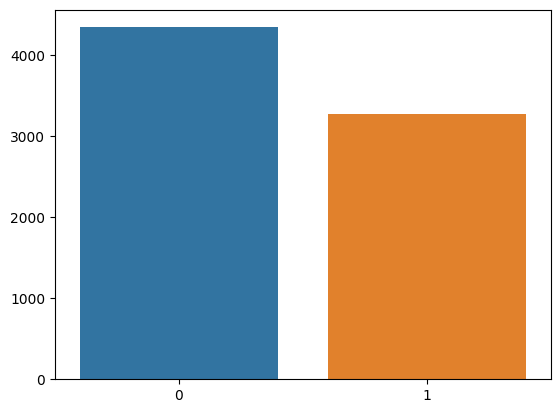

In [29]:
targetValueCounts = trainDf.target.value_counts()
sns.barplot(x = targetValueCounts.index, y = targetValueCounts.values);

## Preprocessing